<a href="https://colab.research.google.com/github/Sejong-Kaggle-Challengers/jeongmin/blob/main/%ED%87%B4%EA%B7%BC%EC%8B%9C%EA%B0%84_%EB%B2%84%EC%8A%A4%EC%8A%B9%EC%B0%A8%EC%9D%B8%EC%9B%90_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- id : 해당 데이터에서의 고유한 ID(train, test와의 중복은 없음)
- date : 날짜
- bus_route_id : 노선ID
- in_out : 시내버스, 시외버스 구분
- station_code : 해당 승하차 정류소의 ID
- station_name : 해당 승하차 정류소의 이름
- latitude : 해당 버스 정류장의 위도 (같은 정류장 이름이어도 버스의 진행 방향에 따라 다를 수 있음)
- longitude : 해당 버스 정류장의 경도 (같은 정류장 이름이어도 버스의 진행 방향에 따라 다를 수 있음)
- X~Y_ride : X:00:00부터 X:59:59까지 승차한 인원 수
- X~Y_takeoff : X:00:00부터 X:59:59까지 하차한 인원 수
- 18~20_ride : 18:00:00부터 19:59:59까지 승차한 인원 수 (train data에만 존재)

#데이터 업로드

In [294]:
!unzip data13.zip

Archive:  data13.zip
replace 행정_법정동 중심좌표.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: ㅜ
error:  invalid response [ㅜ]
replace 행정_법정동 중심좌표.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: ㅜ
error:  invalid response [ㅜ]
replace 행정_법정동 중심좌표.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace submission_sample.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace bus_bts.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [295]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
0,415423,2019-10-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,4.0,4.0,7.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,415424,2019-10-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,6.0,6.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
2,415425,2019-10-01,4270000,시외,432,정존마을,33.48181,126.47352,2.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,415426,2019-10-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
4,415427,2019-10-01,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [296]:
train.shape

(415423, 21)

In [297]:
weather = pd.read_csv("제주시_기온강수량.csv")
weather['rain'] = weather['rain'].fillna(0)
weather

,date,avgTemp,minTemp,maxTemp,rain
0,2019-09-01,23.3,20.6,26.3,26.1
1,2019-09-02,24.1,21.9,26.6,25.7
2,2019-09-03,24.8,22.4,26.7,13.9
3,2019-09-04,24.7,23.7,27.9,43.0
4,2019-09-05,26.2,23.4,30.4,7.0
5,2019-09-06,26.8,25.1,28.6,68.8
6,2019-09-07,27.6,24.9,30.3,34.3
7,2019-09-08,24.5,23.4,26.3,19.0
8,2019-09-09,26.2,23.7,29.0,24.7
9,2019-09-10,27.0,24.0,29.4,0.0


#데이터 전처리
1. 날짜
- 공휴일 유무 column 생성하기 (2019-09-12 ~ 2019-09-14 : 추석)
- 평일/주말 column 생성하기 
2. 	in_out(시내/시외)
- 범주형을 정수형으로 변경
3. bus_route_id
- 노선 ID 값이 8자리로 매우 큰 수 -> 각 값을 str로 바꾼 후 Labelencoder로 
4. station_name, 위도, 경도 행 제거
- station_code를 정렬해본 결과 같은 station_code끼리 이름과 위도 경도가 모두 일치

id와 date는 제외하고 학습에 사용
이후 데이터 정규화 StandardScaler 사용

weather(평균기온, 최저기온, 최고기온, 강수량) 파일과 날짜 기준으로 병합시켜 사용한다.

In [298]:
train = pd.merge(train, weather, on = 'date')
test = pd.merge(test, weather, on = 'date')

In [299]:
#날짜 정보 알아보기
train['date'].unique()

array(['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04',
       '2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08',
       '2019-09-09', '2019-09-10', '2019-09-11', '2019-09-12',
       '2019-09-13', '2019-09-14', '2019-09-15', '2019-09-16',
       '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
       '2019-09-21', '2019-09-22', '2019-09-23', '2019-09-24',
       '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
       '2019-09-29', '2019-09-30'], dtype=object)

In [300]:
test['date'].unique()

array(['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
       '2019-10-05', '2019-10-06', '2019-10-07', '2019-10-08',
       '2019-10-09', '2019-10-10', '2019-10-11', '2019-10-12',
       '2019-10-13', '2019-10-14', '2019-10-15', '2019-10-16'],
      dtype=object)

In [301]:
#요일 
import datetime
train['dayofweek'] = pd.to_datetime(train['date']).dt.weekday
test['dayofweek'] = pd.to_datetime(test['date']).dt.weekday

#요일로 분류한 것을 평일(1)과 주말(0)로 변경
train['weekend']=train['dayofweek'].apply(lambda x:1 if x<5 else 0)
test['weekend']=test['dayofweek'].apply(lambda x:1 if x<5 else 0)
train['weekend']

0         0
1         0
2         0
3         0
4         0
         ..
415418    1
415419    1
415420    1
415421    1
415422    1
Name: weekend, Length: 415423, dtype: int64

In [302]:
#공휴일 -- 공휴일이면 1 아니면 0
#holidays.Korea()를 사용하면 우리나라 지정 공휴일을 구할 수 있는 것 같다.

holi = pd.Series(['2019-09-12','2019-09-13', '2019-09-14'])
train['holiday'] = train['date'].apply(lambda x : 1 if holi[0] == x or holi[1] == x or holi[2] == x else 0 )
holi = pd.Series(['2019-10-03','2019-10-09'])
test['holiday'] = test['date'].apply(lambda x : 1 if holi[0] == x or holi[1] == x else 0 )
print(train['holiday'].value_counts())
print(test['holiday'].value_counts())

0    384704
1     30719
Name: holiday, dtype: int64
0    203564
1     24606
Name: holiday, dtype: int64


In [303]:
#in_out 숫자로 변경 (시외 : 1, 시내 : 0)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['in_out'] = le.fit_transform(train['in_out'])
test['in_out'] = le.transform(test['in_out'])
train['in_out']

0         1
1         1
2         1
3         0
4         0
         ..
415418    0
415419    0
415420    0
415421    0
415422    0
Name: in_out, Length: 415423, dtype: int64

In [304]:
#Labelencoder 똑같이 적용
le = LabelEncoder()
train['bus_route_id'] = le.fit_transform(train['bus_route_id'].astype(str))
test_le = list(le.classes_) + list(set(test['bus_route_id'].unique()) - set(train['bus_route_id'].unique()))

le.fit(test_le)
test['bus_route_id'] = le.transform(test['bus_route_id'].astype(str))

le = LabelEncoder()
le.fit(list(set(test['station_code'].unique()) | set(train['station_code'].unique())))
train['station_code'] = le.transform(train['station_code'])
test['station_code'] = le.transform(test['station_code'])

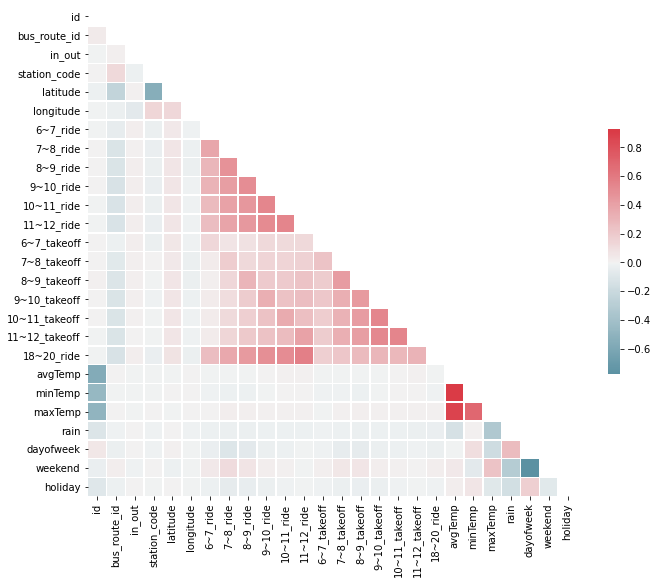

In [305]:
import matplotlib.pyplot as plt #시각화
import seaborn as sns #시각화

corr = train.corr()

#삼각형 마스크를 만든다.(위쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Heatmap 그리기 - mask and correct aspect ratio  사용
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

plt.show()

In [306]:
#필요없는 행 제거
train = train.drop(['station_name', 'dayofweek', 'latitude', 'longitude', 'avgTemp'], axis = 1)
test = test.drop(['station_name', 'dayofweek', 'latitude', 'longitude','avgTemp'], axis = 1)

In [307]:
train_x = train.loc[:, "bus_route_id":"holiday"]
del train_x['18~20_ride']
train_y = train['18~20_ride']

test_x = test.loc[:, "bus_route_id":"holiday"]

In [308]:
#데이터 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

#모델 학습

In [309]:
import torch
import numpy as np
import torch.optim as optim

torch.manual_seed(1)

train_x = np.array(train_x)
train_y = np.array(train_y)

train_x = torch.FloatTensor(train_x)
train_y = torch.FloatTensor(train_y).unsqueeze(1)

train_y

tensor([[0.],
        [5.],
        [2.],
        ...,
        [0.],
        [0.],
        [0.]])

In [310]:
train_x.shape

torch.Size([415423, 20])

In [311]:
W = torch.zeros((14, 1), requires_grad= True)
b = torch.zeros(1, requires_grad= True)

optimizer = optim.SGD([W, b], lr = 1e-2)

nb_epochs = 1000

for epoch in range(nb_epochs + 1) :

  hypothesis = train_x.matmul(W) + b
  cost = torch.mean((hypothesis - train_y)**2)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(epoch, cost.item())

RuntimeError: ignored

In [ ]:
test_x = torch.FloatTensor(np.array(test_x))

predict = (test_x.matmul(W)+b).detach()

submit = pd.read_csv("submission_sample.csv")

for i in range(len(predict)):
  submit["18~20_ride"][i] = predict[i]
  
submit["18~20_ride"] = submit["18~20_ride"].astype(int)

submit.to_csv("submission.csv", index = False, header = True)


#성능 (오차 정도) : 	3.3227256101

----------------------------------------------------------------------------------------
bus_route_id / date / station_code 겹치는 것을 사용

bus_bts 에서 geton_date - getoff_date(Nan값 많음)
대부분 동일 -> geton_date만 사용? 

하차 부분이 안찍힌 경우가 다 Nan값으로 떠있기 때문에
채우는 것이 더 안좋을지 뺴는 부분이 좋을지 ? ? 
-> (895736)Nan값을 일단 제거하고 사용

-> 탑승한 시간별로 그 승객들의 탑승하고 있는 시간의 평균..? 이용?
user_category 사용

station_name / latitude와longitude
합쳐서 사용
지명 - 1/지명 - 2 로 변경하거나
위도 경도만 사용 ? 등등 ..

in_out -> 0과 1로 바꾸기

date -> 공휴일(명절) 유무 / 요일

모델은 LR -> NN 
--> 둘의 큰 차이 없음

#bus_bts(아직 고려 X)

In [ ]:
bus_bts = pd.read_csv("bus_bts.csv")
bus_bts.head()

In [ ]:
bus_bts.shape

In [ ]:
bus_bts.isnull().sum()